In [8]:
import requests
import pandas as pd
from datetime import date
import seaborn as sns
from matplotlib import pyplot as plt, rcParams
import win32com.client
import subprocess
import urllib
import os

In [9]:
url = "https://www.litgrid.eu/index.php/generuoti-excel-dokumenta/475"
params = {
    'filter[from]': '2023-01-01',
    'filter[to]': str(date.today()),
    'lines': 150
}

response = requests.get(url, params=params)
if response.status_code == 200:
    with open('nordpol.xls', 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully as 'nordpol.xls'")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded successfully as 'nordpol.xls'


In [10]:
dt = date.today()

excel = win32com.client.Dispatch('Excel.Application')
excel.DisplayAlerts = False
excel.Visible = False
    
in_file = os.getcwd()+"\\nordpol.xls"
out_file = os.getcwd()+"\\nordpol1.xlsx"
    
wb = excel.Workbooks.Open(in_file)
    
wb.CheckCompatibility = False
wb.DoNotPromptForConvert = True
wb.SaveAs(out_file, FileFormat=56) #Execution hangs here
wb.Close()
excel.Quit()

In [11]:
df = pd.read_excel('nordpol1.xlsx')
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 0': 'dt', 'Unnamed: 1': 'value'},inplace=True)

In [12]:
df['value']= df.value.astype('float')
df['dt'] = pd.to_datetime(df['dt']).dt.strftime("%Y-%m")

In [13]:
monthly_average = df.groupby(by=['dt']).mean()
monthly_average.reset_index(inplace=True)

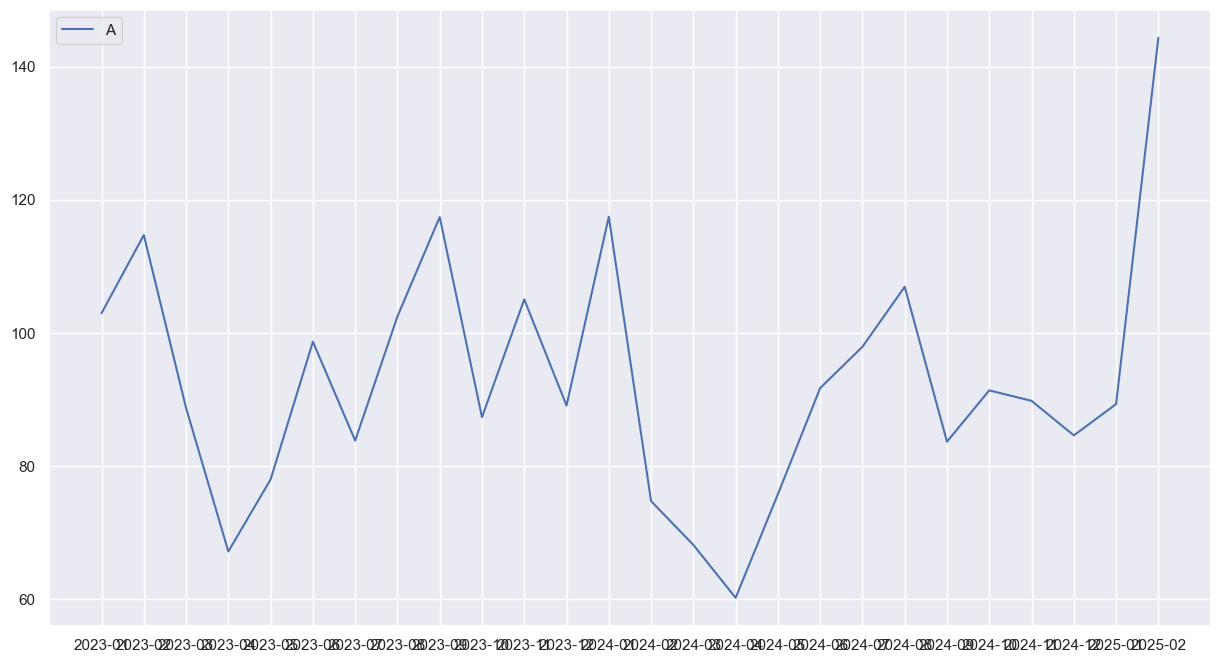

In [14]:
rcParams['figure.figsize'] = 15,8
sns.set()
x=monthly_average['dt']
y = monthly_average['value']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');